In [33]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from scipy.stats import norm as normal_dist
from time import time
import pyaudio

plt.rcParams['figure.figsize'] = [30, 10]
names = ["A BbB C DbD EbE F GbG Ab"[(i%12)*2:(i%12)*2+2].strip() + str(i//12) for i in range(120)]

In [34]:
CHUNK = 2048
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 15
WAVE_OUTPUT_FILENAME = "output.wav"

In [16]:
s = time()

slen = CHUNK

num_notes = 120
num_segments = 1

logs = (np.arange(num_notes * num_segments) - (num_segments//2)) * (1/(12 * num_segments))
freqs = 27.5 * 2**logs

nfft_s = np.zeros((len(freqs), slen))
nfft_c = np.zeros((len(freqs), slen))

rate = 44100

for i in range(len(freqs)):
    seconds = slen/rate
    num_cycles = seconds * freqs[i] # i.e 55 hz * (2048/44100) = 2.55 cycles
    n = num_cycles * 2 * np.pi
    nfft_s[i] = np.arange(slen) * (n/slen)
    nfft_c[i] = np.arange(slen) * (n/slen)
#     for j in range(slen):
#         nfft_s[i][j] = (n*j/slen)
#         nfft_c[i][j] = (n*j/slen)

nfft_s = np.sin(nfft_s)
nfft_c = np.cos(nfft_c)
m = time()

In [17]:
ts = np.genfromtxt("fft.csv", delimiter=",")

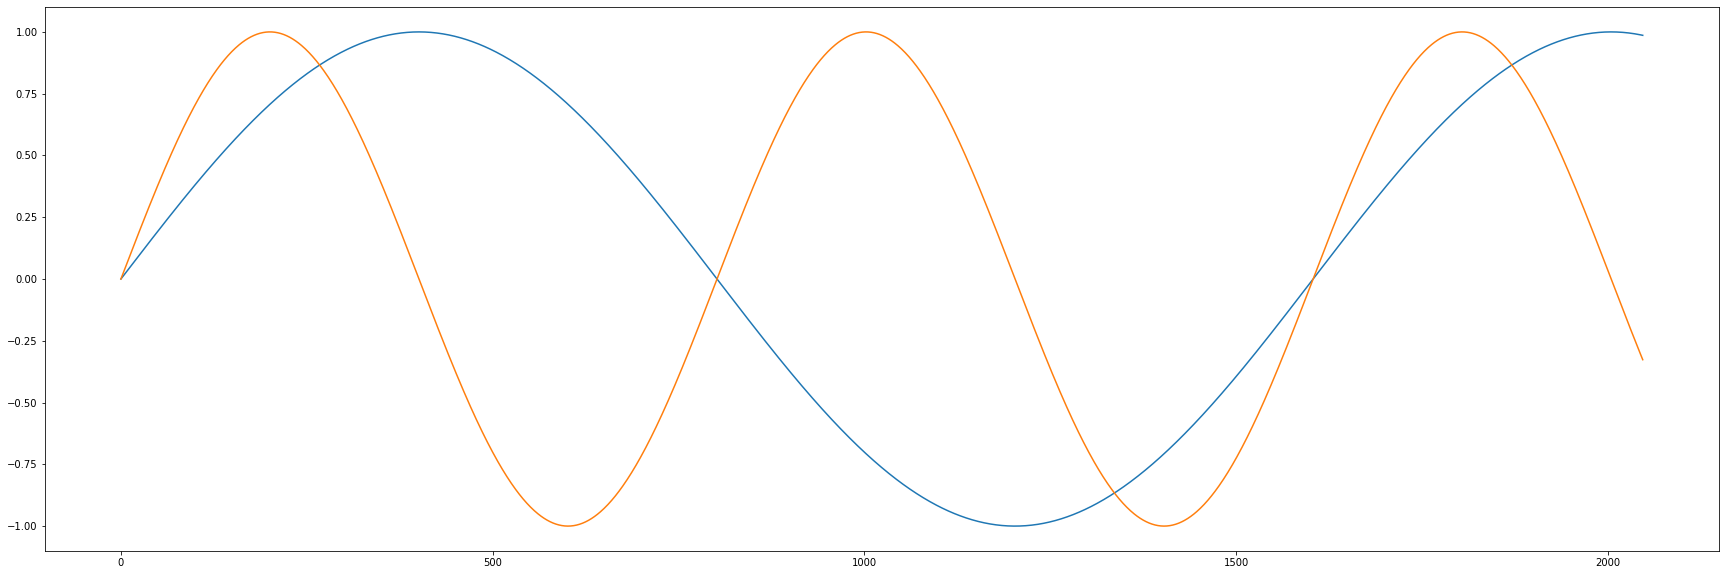

In [18]:
plt.plot(ts[0])
plt.plot(ts[12])

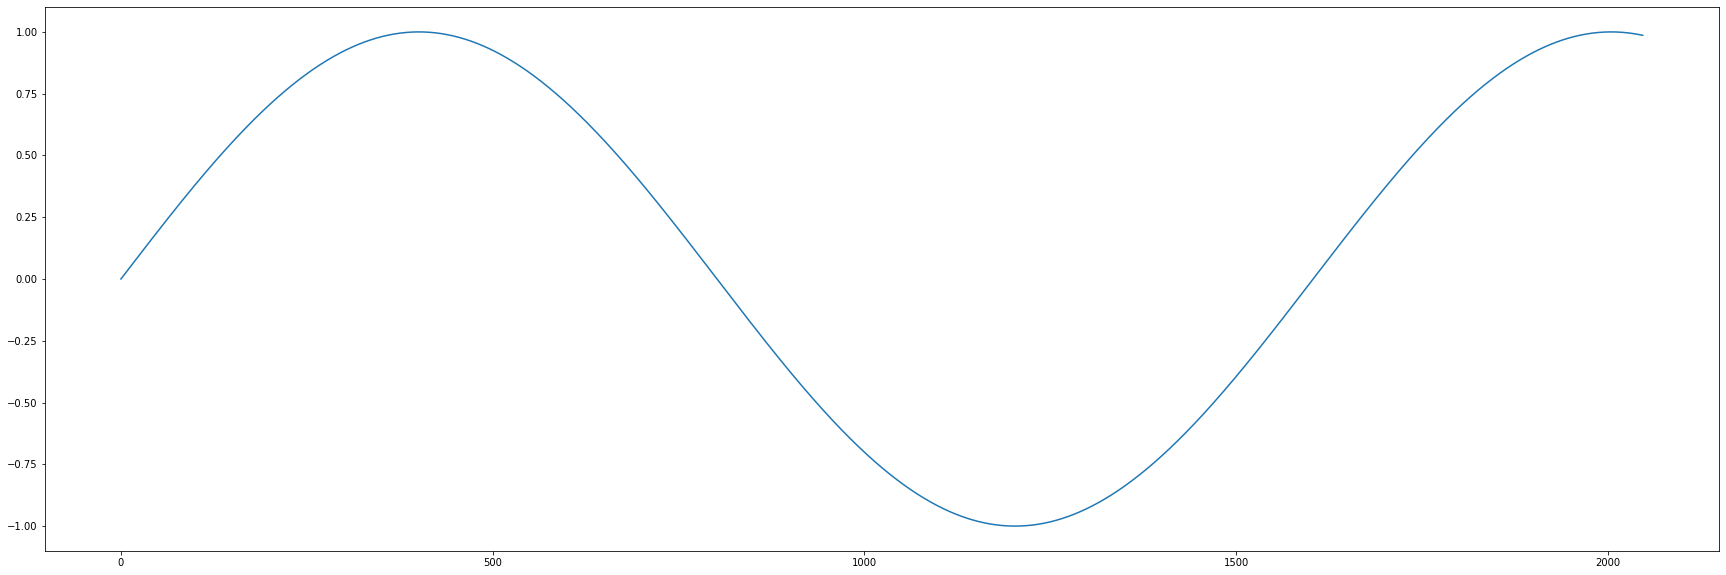

In [19]:
plt.plot(nfft_s[0])

In [26]:
diffs = []

assert len(nfft_s) == len(ts)

for i in range(len(nfft_s)):
    diffs.append(np.average(np.abs(nfft_s[i] - ts[i][:-1])))

In [28]:
np.average(diffs)

9.391158355023954e-06

<BarContainer object of 12 artists>

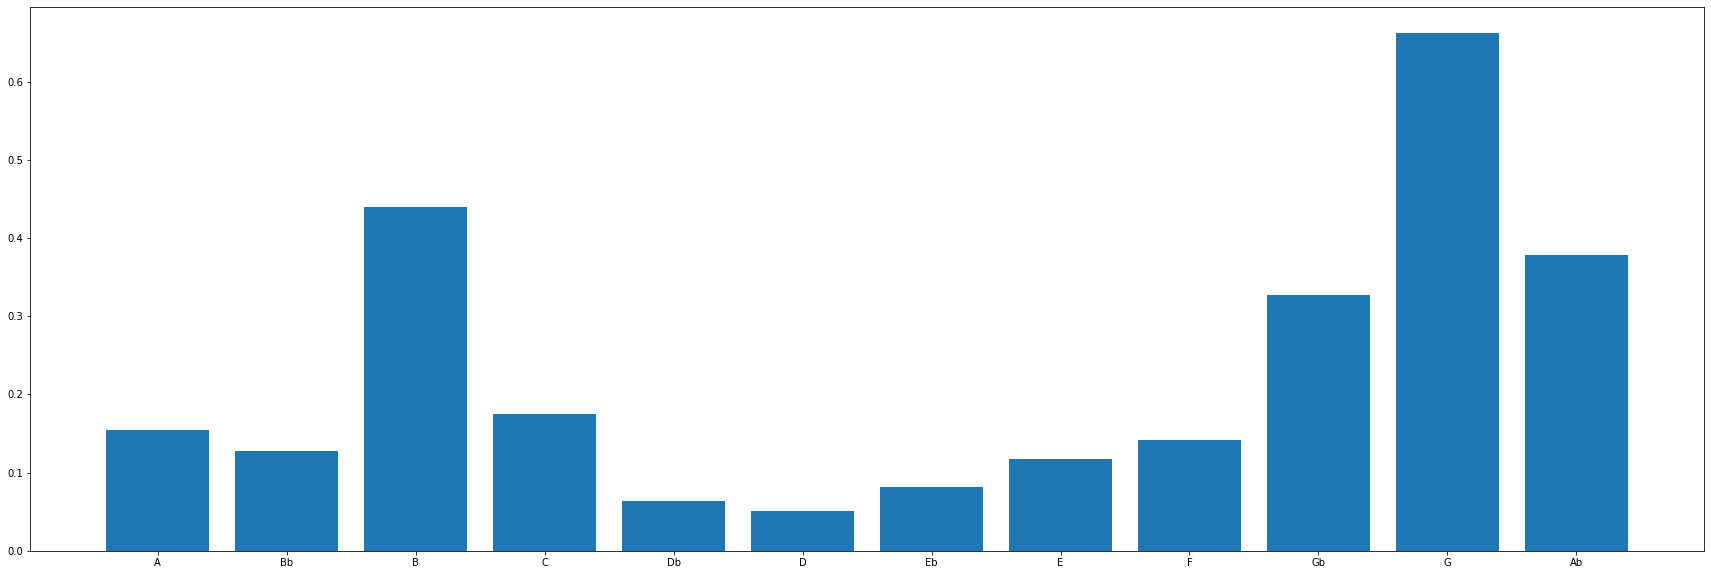

In [53]:
l = np.asarray([11251411628900,
9230221156692,
31919881179204,
12657578130880,
4648428641810,
3692621895424,
5961191382701,
8503255163321,
10321658781857,
23744582385225,
48034451631606,
27453440507638,])

plt.bar(["A", "Bb", "B", "C", "Db", "D", "Eb", "E", "F", "Gb", "G", "Ab"], l/np.linalg.norm(l))

(100, 12)

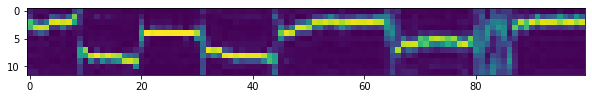

In [60]:
m = ts = np.genfromtxt("tune.csv", delimiter=",")
m.shape
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(m.T[::-1])
plt.show()